In [2]:
import json
import pandas as pd
import matplotlib
import os

In [17]:
def read_logs(fileName:str):
        log_path = os.path.join(os.path.abspath(''), "logs")
        with open(os.path.join(log_path, fileName), "r") as outfile:
                return json.load(outfile)

def create_aggregated_df(world_size: int):
        exp_df = []
        for rank in range(1, world_size + 1):
                if rank == 1:
                        rank_record = read_logs("rank_1.json")
                else:
                        rank_record = read_logs(f"rank_ddp_{rank}.json")
                exp_df.append(rank_record[0])
        return pd.DataFrame(exp_df)

exp_df = create_aggregated_df(7)
exp_df = exp_df.drop("epoch", axis=1)
exp_df

,experiment_key,training_loss,training_time,train_forward_pass,train_backward_pass,train_optimizer_step,train_post_processing,checkpointing,eval_validation_split_loss,eval_validation_split_perplexity,eval_time,eval_post_processing,eval_forward_pass,epoch_time,total_experiment_time
0,rank_1,3.356067,87.521640,22.876519,52.657664,0.960866,0.092508,16.077006,3.101356,22.228064,8.784850,0.006156,6.211689,112.383496,116.582786
1,rank_2,3.426901,44.966759,12.054499,26.889772,0.467464,0.050046,15.243979,3.124360,22.745648,4.820091,0.073009,3.478390,65.030829,77.932835
2,rank_3,3.485631,30.176131,8.271043,17.905181,0.311757,0.037074,15.424486,3.134021,22.966440,3.498613,0.045994,2.621807,49.099230,61.726801
3,rank_4,3.537087,23.672595,6.556460,13.734150,0.230060,0.038701,15.211061,3.145537,23.235086,2.916227,0.024091,2.249481,41.799883,55.754013
4,rank_5,3.592148,19.434262,5.666341,11.042545,0.186596,0.044251,14.915368,3.152922,23.410983,2.512991,0.067609,1.943476,36.862621,54.052555
5,rank_6,3.654912,16.611923,5.083001,9.015017,0.161277,0.049906,14.883916,3.167741,23.765735,2.629243,0.039159,2.179675,34.125082,52.577268
6,rank_7,3.696782,15.124586,4.920016,8.087509,0.132399,0.049261,14.862574,3.168598,23.776265,2.642070,0.067832,2.210794,32.629229,49.888978


In [18]:
exp_df.columns

Index(['experiment_key', 'training_loss', 'training_time',
       'train_forward_pass', 'train_backward_pass', 'train_optimizer_step',
       'train_post_processing', 'checkpointing', 'eval_validation_split_loss',
       'eval_validation_split_perplexity', 'eval_time', 'eval_post_processing',
       'eval_forward_pass', 'epoch_time', 'total_experiment_time'],
      dtype='object')

In [19]:
df_total_experiment_time = exp_df[['experiment_key', 'total_experiment_time']].groupby(by="experiment_key").max()
df_total_experiment_time.head()

,total_experiment_time
experiment_key,
rank_1,116.582786
rank_2,77.932835
rank_3,61.726801
rank_4,55.754013
rank_5,54.052555


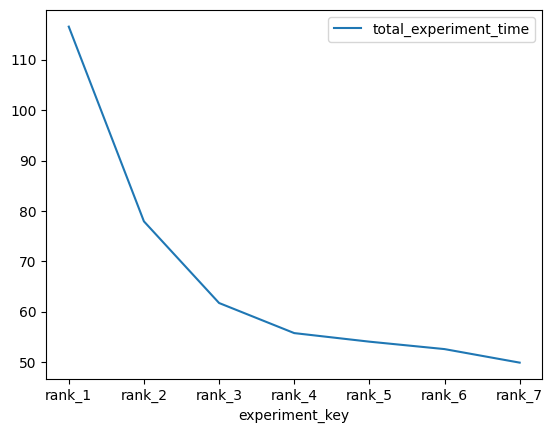

In [20]:
ax = df_total_experiment_time[['total_experiment_time']].plot()